In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 29 11:25:29 2019
@author: energise
script adjusted from SPBC to read in impedance model and graph networkx

"""
import importlib
import setup_nx
import numpy as np
import math as m
import statistics as st
import cmath
import matplotlib.pyplot as plt 
from operator import add
importlib.reload(setup_nx)
from setup_nx import *
from graphviz import Source, render

import datetime
import time

#import pandas as pd
#import os.path as path

In [6]:
'EDIT THIS CELL TO MEET YOUR SPECIFICATIONS BEFORE RUNNING'

#==========================================================================================================

'specifying file paths'
# Enter the path/name of the model's excel file and import
    # All GridBright load files should be in the following folder
    #loadfolder = "/Users/jasperpakshong/Documents/Berkeley/ENERGISE/IEEE13/"
    #loadpath = loadfolder + "IEEE13testload_w_extreme_act.xlsx"

    # filepath = "IEEE13/"
    # modelpath = filepath + "001 phasor08_IEEE13_OPAL.xls"
    # loadfolder = "IEEE13/"
    # loadpath = loadfolder + "001_phasor08_IEEE13_norm03_HIL_7_1.xlsx"

    #filepath = "AL0001/"
    #modelpath = filepath + "AL0001_OPAL_working.xls"
    #loadfolder = "AL0001/"
    #loadpath = loadfolder + "AL0001_tvload_afternoon1h.csv"
    
    #filepath = "13NF_balanced/"
    #modelpath = filepath + "016 GB_IEEE13_balance_all_ver2.xls"
    #loadfolder = "13NF_balanced/"
    #loadpath = loadfolder + "016 GB_IEEE13_balance all ver2_time_sigBuilder_secondWise_norm03.csv"

filepath = "123NF/"
modelpath = filepath + "004_GB_IEEE123_OPAL.xls"
loadfolder = "123NF/"
loadpath = loadfolder + "004_GB_IEEE123_time_sigBuilder_secondwise_norm1.csv"

#==========================================================================================================

'specifying file name'
#file_name = string specifying name of dot file created when make_graph() is called
file_name = '123NF_test.dot'

#==========================================================================================================

'list actuator locations and performance node'
# all_act_locs = list of node names as strings where actuators will be placed
all_act_locs = ['bus_39','bus_40','bus_53']
perf_nodes = ['bus_39','bus_40','bus_53']

#==========================================================================================================

'Specify substation kV, kVA bases, name, and the number of timesteps in the load data'
Vbase_ll = 4160
Vbase = Vbase_ll / np.sqrt(3)
Sbase = 5000/3
substation_name = 'bus_150'
timesteps = 1


2020-07-10 21:53:35.843153
Finished initializing feeder
bus_1
bus_10
bus_100
bus_101
bus_102
bus_103
bus_104
bus_105
bus_106
bus_107


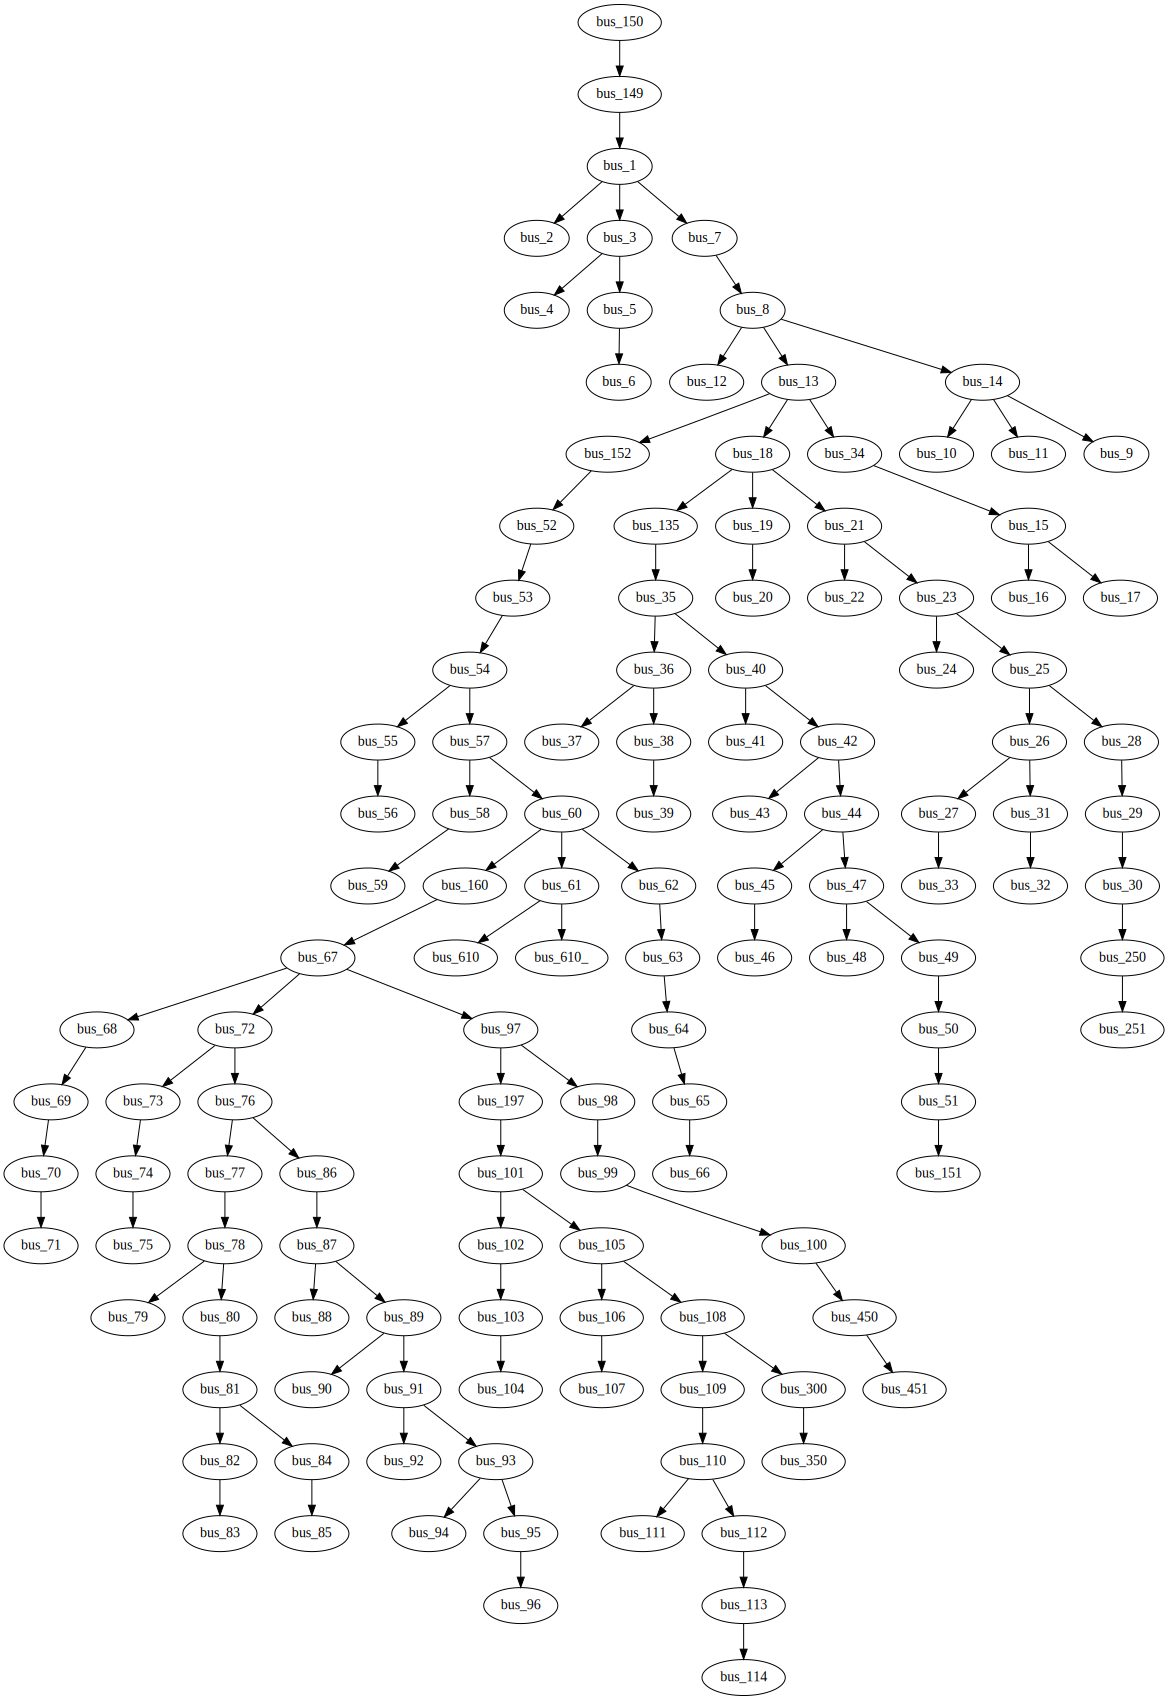

In [3]:
'DO NOT NEED TO EDIT THIS CELL BEFORE RUNNING'

ts = time.time()
print()
print(datetime.datetime.fromtimestamp(ts))

plot = 0 #turn plot on/off

depths = {}
leaves = []

def feeder_init():
    modeldata = pd.ExcelFile(modelpath)
    actpath = loadpath
    
    # set dummy values for undefined variables
    date = datetime.datetime.now()
    month = date.month
    day = date.day
    hour = date.hour
    minute = date.minute
    #timestepcur = hour*60+minute
    timestepcur = 0
    
    Psat_nodes = []
    Qsat_nodes = []
    
    refphasor = np.ones((3,2))
    refphasor[:,0]=1
    refphasor[:,1]=[0,4*np.pi/3,2*np.pi/3]
    
    PVforecast = 0
    
    #get feeder
    fin_feeder = feeder(modelpath,loadfolder,loadpath,actpath,timesteps,timestepcur,
                         Vbase_ll,Sbase,refphasor,Psat_nodes,Qsat_nodes,PVforecast, depths, leaves)
    
    return fin_feeder

def nx_plot(feeder):
    #plt.title('13_node_test')
    #pos = nx.nx_agraph.graphviz_layout(feeder.network, prog='dot')
    #pos = nx.spectral_layout(feeder.network)
    #nx.draw(feeder.network, pos, with_labels=True, arrows=True)
    #plt.savefig('13_node_test.png')
    
    ### THESE ARE ADDITIONS ONLY FOR THE PL0001 FEEDER
    #feeder.network.add_edge('bus_N_300062298', 'bus_N_L_22666_sec')
    #feeder.network.add_edge('bus_N_300062062', 'bus_N_L_21316_sec')
    #feeder.network.add_edge('bus_N_300062332', 'bus_N_L_22077_sec')
    #feeder.network.add_edge('bus_N_300053280', 'bus_N_L_52586_sec')
    #feeder.network.add_edge('bus_N_300006691', 'bus_N_L_38426_sec')
    
    ### THESE ARE ADDITIONS ONLY FOR THE AL0001 FEEDER
    #feeder.network.add_edge('bus_N_900081044', 'bus_N_L_87632_sec')
    #feeder.network.add_edge('bus_N_900059208', 'bus_N_L_46793_sec')
    #feeder.network.add_edge('bus_N_900060818', 'bus_N_L_17532_sec')
    #feeder.network.add_edge('bus_N_900076500', 'bus_N_L_108238_sec')
    #feeder.network.add_edge('bus_N_900059040', 'bus_N_L_111610_sec')
    #feeder.network.add_edge('bus_N_900059556', 'bus_N_L_147411_sec')
    #feeder.network.add_edge('bus_N_900047073', 'bus_N_L_6860_sec')
    #feeder.network.add_edge('bus_N_900054239', 'bus_N_L_9709_sec')
    #feeder.network.add_edge('bus_N_900056678', 'bus_N_L_110483_sec')
    #feeder.network.add_edge('bus_N_900059242', 'bus_N_L_132901_sec')
    #feeder.network.add_edge('bus_N_900019520', 'bus_N_L_40688_sec')
    #feeder.network.add_edge('bus_N_900056622', 'bus_N_L_138443_sec')
    #feeder.network.add_edge('bus_N_900059203', 'bus_N_L_108120_sec')
    #feeder.network.add_edge('bus_N_900080808', 'bus_N_L_116563_sec')
    #feeder.network.add_edge('bus_N_900008961', 'bus_N_L_113827_sec')
    
    #nx.nx_pydot.write_dot(feeder.network, '13_node_test.dot')
    return

def make_graph(feeder, file_name):
    #file_name = string specifying name of dot file created when make_graph() is called
    #feeder = initialized feeder object from feeder_init()
    nx.nx_pydot.write_dot(feeder.network, file_name)
    render('dot', 'png', file_name)  
    return

fin_feeder = feeder_init()
print("Finished initializing feeder")
make_graph(fin_feeder, file_name)


count = 0
for i in fin_feeder.network:    
    print(i)
    count += 1
    if count >= 10:
        break
    
Source.from_file(file_name)

In [4]:
import matplotlib.pyplot as plt

#Notes on the following two methods:
#1) Does not account for the presence of artifically added transformer windings, because I would have to separate out
#the line impedance information
#2) Will not function properly if there are cycles
#3) Assumes that switches and transformers have zero impedance; the latter case is due to unit discrepancy: transformer
#impedances use PU, line impedances use Ohms

slack_bus = None
for bus_name, depth in depths.items():
    if depth == 0:
        slack_bus = bus_name
        break

def get_total_impedance_from_substation(feeder, node_name):
    node_name_full = node_name

    #Notice that since this is a tree, any node will only have at most one predecessor
    total_impedance = {'Phase 1' : 0.0, 'Phase 2' : 0.0, 'Phase 3' : 0.0}
    
    current_node = node_name_full
    pred_list = None
    
    try:
        pred_list = list(feeder.network.predecessors(node_name_full))
    except nx.NetworkXError:
        print("Bus with name " + current_node + " does not exist in the feeder.")
        return 0
    
    iter_depth = depths[current_node]
    
    for _ in range(iter_depth):
        #pred_list[0] is the parent node
        impedance = feeder.network.get_edge_data(pred_list[0], current_node, default=None)['connector']
        #print("Type is " + str(type(impedance)))
        if impedance == None:
            print("WARNING: No connection between nodes " + str(pred_list[0]) + " and " + str(current_node) + ".")
            return 0
        else:
            imp_dict = impedance.Z if isinstance(impedance, line) else np.zeros((3,3))
            
            total_impedance['Phase 1'] += imp_dict[0][0]
            total_impedance['Phase 2'] += imp_dict[1][1]
            total_impedance['Phase 3'] += imp_dict[2][2]
            
            current_node = pred_list[0]
            pred_list = list(feeder.network.predecessors(current_node))
    
    return total_impedance

#Method will return a the distance sum of impedances to a common bus upstream if the two buses are not along the
#the same path. For example:
#     A      Calculating total impedance between B and C yields Z_AB + Z_CA
#    / \
#   B   C

def get_total_impedance_between_two_buses(feeder, node_name_1, node_name_2):
    bus_1 = node_name_1
    bus_2 = node_name_2
   
    total_impedance = {'Phase 1' : 0.0, 'Phase 2' : 0.0, 'Phase 3' : 0.0}
    
    depth_1 = 0
    depth_2 = 0
    
    try:
        depth_1 = depths[bus_1]
        depth_2 = depths[bus_2]
    except KeyError:
        print("Either the first bus, " + bus_1 + ", or the second bus, " + bus_2 + " is not a valid bus in the feeder.")
        return 0
    
    depth_dif = abs(depth_1 - depth_2)
    
    max_depth_bus = bus_1 if depth_1 > depth_2 else bus_2
    min_depth_bus = bus_1 if max_depth_bus == bus_2 else bus_2
    
    pred_list_max = list(feeder.network.predecessors(max_depth_bus))
    pred_list_min = list(feeder.network.predecessors(min_depth_bus))
    
    for i in range(depth_dif):
        
        impedance = feeder.network.get_edge_data(pred_list_max[0], max_depth_bus, default=None)['connector']
        if impedance == None:
            print("WARNING: No connection between nodes " + str(pred_list_max[0]) + " and " + str(max_depth_bus) + ".")
            return 0
        else:
            imp_dict = impedance.Z if isinstance(impedance, line) else np.zeros((3,3))
            
            total_impedance['Phase 1'] += imp_dict[0][0]
            total_impedance['Phase 2'] += imp_dict[1][1]
            total_impedance['Phase 3'] += imp_dict[2][2]
            
            #Case of where we the two buses are directly linked by purely upstream connections, allowing us to
            #terminate our calculations earlier
            if pred_list_max[0] == min_depth_bus:
                #print("Iterated " + str(i+1) + " times to get direct upstream connection total impedance.")
                return total_impedance
            
            max_depth_bus = pred_list_max[0]
            pred_list_max = list(feeder.network.predecessors(max_depth_bus))
            
    assert(depths[max_depth_bus] == depths[min_depth_bus])
    
    #print("Iterated " + str(depth_dif) + " times to reach equal depths.")
    
    common_parent = pred_list_max[0] == pred_list_min[0]
    
    count_get_to_common = 0
    
    #Here, we simultaneously shift both buses (after the max depth bus has been shifted to be of equal depth to the min
    #depth bus) to a point where the parent bus is shared
    while not common_parent:
        count_get_to_common += 1
        
        impedance_bus_min = feeder.network.get_edge_data(pred_list_min[0], min_depth_bus, default=None)['connector']
        if impedance_bus_min == None:
            print("WARNING: No connection between nodes " + str(pred_list_min[0]) + " and " + str(min_depth_bus) + ".")
            return 0
        else:
            imp_dict_min = impedance_bus_min.Z if isinstance(impedance_bus_min, line) else np.zeros((3,3))
            
            total_impedance['Phase 1'] += imp_dict_min[0][0]
            total_impedance['Phase 2'] += imp_dict_min[1][1]
            total_impedance['Phase 3'] += imp_dict_min[2][2]
            
            min_depth_bus = pred_list_min[0]
            pred_list_min = list(feeder.network.predecessors(min_depth_bus))
            
        impedance_bus_max = feeder.network.get_edge_data(pred_list_max[0], max_depth_bus, default=None)['connector']
        if impedance_bus_max == None:
            print("WARNING: No connection between nodes " + str(pred_list_max[0]) + " and " + str(max_depth_bus) + ".")
            return 0
        else:
            imp_dict_max = impedance_bus_max.Z if isinstance(impedance_bus_max, line) else np.zeros((3,3))
            
            total_impedance['Phase 1'] += imp_dict_max[0][0]
            total_impedance['Phase 2'] += imp_dict_max[1][1]
            total_impedance['Phase 3'] += imp_dict_max[2][2]
            
            max_depth_bus = pred_list_max[0]
            pred_list_max = list(feeder.network.predecessors(max_depth_bus))
            
        common_parent = pred_list_max[0] == pred_list_min[0]
    
    #print("Total iterations to get to common parent is " + str(count_get_to_common))
    #print("Common parent is " + str(pred_list_max[0]))
    
    #Need to iterate one more time to account for "joining" node
    impedance_bus_min = feeder.network.get_edge_data(pred_list_min[0], min_depth_bus, default=None)['connector']
    if impedance_bus_min == None:
        print("WARNING: No connection between nodes " + str(pred_list_min[0]) + " and " + str(min_depth_bus) + ".")
        return 0
    else:
        imp_dict_min = impedance_bus_min.Z if isinstance(impedance_bus_min, line) else np.zeros((3,3))

        total_impedance['Phase 1'] += imp_dict_min[0][0]
        total_impedance['Phase 2'] += imp_dict_min[1][1]
        total_impedance['Phase 3'] += imp_dict_min[2][2]

    impedance_bus_max = feeder.network.get_edge_data(pred_list_max[0], max_depth_bus, default=None)['connector']
    if impedance_bus_max == None:
        print("WARNING: No connection between nodes " + str(pred_list_max[0]) + " and " + str(max_depth_bus) + ".")
        return 0
    else:
        imp_dict_max = impedance_bus_max.Z if isinstance(impedance_bus_max, line) else np.zeros((3,3))

        total_impedance['Phase 1'] += imp_dict_max[0][0]
        total_impedance['Phase 2'] += imp_dict_max[1][1]
        total_impedance['Phase 3'] += imp_dict_max[2][2]
        
    return total_impedance
    
#Returns the X/R ratio from a node up to the substation       
def get_XR_ratio(feeder, node_name):
    impedances_per_phase = get_total_impedance_from_substation(feeder, node_name)
    
    p1_z = impedances_per_phase['Phase 1']
    p2_z = impedances_per_phase['Phase 2']
    p3_z = impedances_per_phase['Phase 3']

    p1_xr = np.imag(p1_z) / np.real(p1_z) 
    p2_xr = np.imag(p1_z) / np.real(p2_z)
    p3_xr = np.imag(p1_z) / np.real(p3_z)
    
    return {'Phase 1' : p1_xr, 'Phase 2' : p2_xr, 'Phase 3' : p3_xr}

#Returns the R/X ratio between 2 nodes      
def get_RX_ratio_between_two_buses(feeder, node_name_1, node_name_2):
    impedances_per_phase = get_total_impedance_between_two_buses(feeder, node_name_1, node_name_2)
    
    p1_z = impedances_per_phase['Phase 1']
    p2_z = impedances_per_phase['Phase 2']
    p3_z = impedances_per_phase['Phase 3']

    p1_xr = np.real(p1_z) / np.imag(p1_z) 
    p2_xr = np.real(p2_z) / np.imag(p1_z) 
    p3_xr = np.real(p3_z) / np.imag(p1_z) 
    
    return {'Phase 1' : p1_xr, 'Phase 2' : p2_xr, 'Phase 3' : p3_xr}

def plot_histogram_XR_ratios(feeder, leaves_only=False):
    nodes_to_use = leaves if leaves_only else list(feeder.network.nodes)
    
    #PL0001 Case
    #lst_remove = ['bus_N_L_22666_sec', 'bus_N_L_21316_sec', 'bus_N_L_22077_sec', 
                  #'bus_N_L_52586_sec', 'bus_N_L_38426_sec', slack_bus]
    #AL0001 Case
    lst_remove = ['bus_N_L_87632_sec', 'bus_N_L_46793_sec', 'bus_N_L_17532_sec',
                 'bus_N_L_108238_sec', 'bus_N_L_111610_sec', 'bus_N_L_147411_sec',
                 'bus_N_L_6860_sec', 'bus_N_L_9709_sec', 'bus_N_L_110483_sec',
                 'bus_N_L_132901_sec', 'bus_N_L_40688_sec', 'bus_N_L_138443_sec',
                 'bus_N_L_108120_sec', 'bus_N_L_116563_sec', 'bus_N_L_113827_sec', slack_bus]
    
    nodes_to_use = [nd for nd in nodes_to_use if nd not in lst_remove]
    
    XR_ratios_all = [get_XR_ratio(feeder, node_name) for node_name in nodes_to_use]
    
    phase_1_XR_ratios = [phase_dct['Phase 1'] for phase_dct in XR_ratios_all]
    phase_2_XR_ratios = [phase_dct['Phase 2'] for phase_dct in XR_ratios_all]
    phase_3_XR_ratios = [phase_dct['Phase 3'] for phase_dct in XR_ratios_all]
    
    plt.title("Phase 1 X/R Ratio Histogram")
    plt.xlabel("X/R Ratio")
    plt.ylabel("Number of Nodes")
    plt.hist(phase_1_XR_ratios, bins=20)
    plt.savefig('AL0001_XRhist_phA.png') # modify for each feeder
    plt.show() # need to savefig before plt.show

    plt.title("Phase 2 X/R Ratio Histogram")
    plt.xlabel("X/R Ratio")
    plt.ylabel("Number of Nodes")
    plt.hist(phase_2_XR_ratios, bins=20)
    plt.savefig('AL0001_XRhist_phB.png') # modify for each feeder
    plt.show()
    
    plt.title("Phase 3 X/R Ratio Histogram")
    plt.xlabel("X/R Ratio")
    plt.ylabel("Number of Nodes")
    plt.hist(phase_3_XR_ratios, bins=20)
    plt.savefig('AL0001_XRhist_phC.png') # modify for each feeder
    plt.show()

# -------------------- now we call functions: ---------------------------------------------
# modify node names when change feeders
#plot_histogram_XR_ratios(fin_feeder, leaves_only = True)
#print('Z between buses:')
#print(get_total_impedance_between_two_buses(fin_feeder, 'bus_632', 'bus_684'))
#print('\nZ to substation:')
#print(get_total_impedance_from_substation(fin_feeder, 'bus_632'))
#print('\nX/R ratio of path to substation:')
#print(get_XR_ratio(fin_feeder, 'bus_632'))
# should check on how to format the printing do that it's to like 2 decimal places

print('R/X Ratios:')
print('\n67 to 79: ')
print(get_RX_ratio_between_two_buses(fin_feeder, 'bus_67', 'bus_79'))
print('\n67 to 96: ')
print(get_RX_ratio_between_two_buses(fin_feeder, 'bus_67', 'bus_96'))
print('\n67 to 104: ')
print(get_RX_ratio_between_two_buses(fin_feeder, 'bus_67', 'bus_104'))
print('\n67 to 114: ')
print(get_RX_ratio_between_two_buses(fin_feeder, 'bus_67', 'bus_114'))
print('\n57 to 66: ')
print(get_RX_ratio_between_two_buses(fin_feeder, 'bus_57', 'bus_66'))
print('\n18 to 251: ')
print(get_RX_ratio_between_two_buses(fin_feeder, 'bus_18', 'bus_251'))
print('\n35 to 151: ')
print(get_RX_ratio_between_two_buses(fin_feeder, 'bus_35', 'bus_151'))

R/X Ratios:

67 to 79: 
{'Phase 1': 0.4244897959183673, 'Phase 2': 0.1423933209647495, 'Phase 3': 0.42810760667903525}

67 to 96: 
{'Phase 1': 0.4244897959183674, 'Phase 2': 0.2354517450204782, 'Phase 3': 0.4281076066790353}

67 to 104: 
{'Phase 1': 0.42448979591836733, 'Phase 2': 0.14239332096474952, 'Phase 3': 3.5106679035250457}

67 to 114: 
{'Phase 1': 0.7965928231351865, 'Phase 2': 0.04810215832974265, 'Phase 3': 0.14461984409886797}

57 to 66: 
{'Phase 1': 1.3616145112192701, 'Phase 2': 0.44288214620401156, 'Phase 3': 1.3631103286835144}

18 to 251: 
{'Phase 1': 0.4244897959183674, 'Phase 2': 0.14239332096474952, 'Phase 3': 0.42810760667903525}

35 to 151: 
{'Phase 1': 0.4244897959183674, 'Phase 2': 0.14239332096474955, 'Phase 3': 0.42810760667903525}


In [7]:
'DO NOT NEED TO EDIT THIS CELL BEFORE RUNNING'
# See pseudocode doc for more complete descriptions of each method:
# https://docs.google.com/document/d/1VdYNN96FhywGcb0QNml61C8GLlIXbs8bU1Bh2cINPt0/edit

def get_path_to_substation(feeder, node):
    #returns list of edges between node and substation
    #node = node name as string
    #feeder = initiaized feeder object
    graph = feeder.network
    node_path = []
    current_node = node
    
    for i in range(depths[node]):
        pred_node = list(graph.predecessors(current_node)) #retrieves parent node of current_node
        node_path += [(current_node, pred_node[0])]
        current_node = pred_node[0]
    return node_path


def createRXmatrices(feeder, node_index_map):
    #calculated using phase A impedances unless there is no phase A then phase B else phase C
    #feeder = initiaized feeder object
    #node_index_map = dictionary of node indices with node names as keys
    graph = feeder.network
    n = len(graph.nodes) #number of nodes
    R = np.zeros((n,n)) #initializing R matrix
    X = np.zeros((n,n)) #initializing X matrix
    P = {} #initializing line path dictionary
   
    for node in graph.nodes:
        P[node] = get_path_to_substation(feeder, node)
    
    for n_outer in graph.nodes: #outer loop
        index_outer = node_index_map[n_outer]
        
        for n_inner in graph.nodes: #inner loop
            index_inner = node_index_map[n_inner]
            intersection_set = set.intersection(set(P[n_outer]), set(P[n_inner])) #finds common edges in paths from node to substation
            intersection_list = list(intersection_set)
            r_sum = 0
            x_sum = 0
            
            for edge in intersection_list: #iterates through shared edges and sums their impedances
                tot_edge_impedance = get_total_impedance_between_two_buses(feeder, edge[0], edge[1])
                
                if tot_edge_impedance['Phase 1']:
                    phase_edge_impedance = tot_edge_impedance['Phase 1']
                elif tot_edge_impedance['Phase 2']:
                    phase_edge_impedance = tot_edge_impedance['Phase 2']
                else:
                    phase_edge_impedance = tot_edge_impedance['Phase 3']  
                    
                r_sum += phase_edge_impedance.real
                x_sum += phase_edge_impedance.imag
            R[index_outer][index_inner] = 2*r_sum
            X[index_outer][index_inner] = 2*x_sum
            
    return R, X


def createRXmatrices_3ph(feeder, node_index_map):
    #includes all 3 phases
    #feeder = initiaized feeder object
    #node_index_map = dictionary of node indices with node names as keys
    graph = feeder.network
    n = len(graph.nodes) #number of nodes
    R = np.zeros((3*n, 3*n)) #initializing R matrix
    X = np.zeros((3*n, 3*n)) #initializing X matrix
    P = {} #initializing line path dictionary
   
    for node in graph.nodes:
        P[node] = get_path_to_substation(feeder, node)
    
    for n_outer in graph.nodes: #outer loop
        index_outer = node_index_map[n_outer]
        
        for n_inner in graph.nodes: #inner loop
            index_inner = node_index_map[n_inner]
            intersection_set = set.intersection(set(P[n_outer]), set(P[n_inner])) #finds common edges in paths from node to substation
            intersection_list = list(intersection_set)
            imped_sum = np.zeros((3,3))
            imped_sum = imped_sum.astype('complex128')
            
            for edge in intersection_list: #iterates through shared edges and sums their impedances
                impedance = feeder.network.get_edge_data(edge[1], edge[0], default=None)['connector']
                tot_edge_impedance = impedance.Z if isinstance(impedance, line) else np.zeros((3,3)) 
                imped_sum += tot_edge_impedance
            
            for i_row in range(3):
                
                for i_col in range(3):
                    R[(3 * index_outer) + i_row][(3 * index_inner) + i_col] = 2 * imped_sum[i_row][i_col].real
                    X[(3 * index_outer) + i_row][(3 * index_inner) + i_col] = 2 * imped_sum[i_row][i_col].imag
            
    return R, X


def createNodeIndexMap(feeder):
    #indexes assigned based on numerical value of node, not node's possition in the network
    #for example, the node named with the lowest numerical value will map to 0, not the substation
    #feeder = initiaized feeder object
    graph = feeder.network
    node_index_map = {} #node indices for indicMat and F matrix
    t = 0 #initializing first index for node_index_map
    
    for node in graph.nodes: #populating node_idex_map
        node_index_map[node] = t
        t += 1
    return node_index_map


def getKey(dictionary, value):
    #use to retrieve node name from node_index_map using node index
    #value = node index
    for k, v in dictionary.items(): 
         if value == v:
                key = k
    return key 


def setupStateSpace(n, feeder, node_index_map):
    #n = number of nodes in network
    #feeder = initiaized feeder object
    #node_index_map = dictionary of node indices with node names as keys
    A = np.identity(6*n)
    R, X = createRXmatrices(feeder, node_index_map)
    concat_XR = np.concatenate((X, R), axis = 1)
    concat_XR_halfs = np.concatenate(((-1/2) * R, (1/2) * X), axis = 1)
    B = np.concatenate((concat_XR, concat_XR_halfs))
    return A, B


#def computeFeas(feeder, act_locs, A, B, indicMat):
    #node_1 = list(feeder.network.successors(substation_name))
    #z12 = get_total_impedance_from_substation(feeder, node_1[0])['Phase 1']
    #matExist = detControlMatExistence(A, B, indicMat)
    #maxLznError = detLznRange(feeder, Vbase_ll, Sbase, z12, act_locs)
    #return matExist, maxLznError
    
    
def computeFeas(feeder, act_locs, A, B, indicMat):
    random_bit = np.random.choice(2,1)
    if random_bit[0] == 0:
        feas = True
    else:
        feas = False
    maxError = 10
    return feas, maxError


def updateStateSpace(n, act_locs, perf_nodes, node_index_map):
    #creates (2n*2n) matrix with 1 and ij and (i+n)(j+n) if there is an actuator at i tracking a performance node at j, and 0 otherwise
    #n = number of nodes in network
    #act_locs = list of actuators locations in network (list of strings)
    #perf_node = performance node as string
    #node_index_map = dictionary of node indices for indicMat and F matrix
    indicMat = np.zeros((6*n,6*n))
    
    for i in range(len(act_locs)): 
        act = act_locs[i]
        perf = perf_nodes[i]
        act_index = node_index_map[act]
        perf_index = node_index_map[perf]
        indicMat[act_index][perf_index] = 1
        indicMat[act_index+n][perf_index+n] = 1
    return indicMat
    
    
def markActLoc(graph, act_loc):
    #changes color of nodes with set actuators to turquoise
    #graph = networkx graph object (feeder.network)
    #act_loc = node name as string where actuator is placed
    graph.nodes[act_loc]['style'] = 'filled'
    graph.nodes[act_loc]['fillcolor'] = 'turquoise'
    return
        

def markFeas(feas, test_act_loc, graph):
    #if controllability can be achieved with actuator at test_act_loc then mark green, otherwise mark red
    #feas = True or False
    #test_act_loc = node name as string
    #graph = networkx graph object (feeder.network)
    graph.nodes[test_act_loc]['style'] = 'filled'
   
    if feas:
        graph.nodes[test_act_loc]['fillcolor'] = 'green'
    else:
        graph.nodes[test_act_loc]['fillcolor'] = 'red'
    return

def eval_config1(feeder, all_act_locs, perf_nodes, node_index_map):
    #all_act_locs and perf_node = lists of node names as strings
    graph = feeder.network
    n = len(graph.nodes) #number of nodes in network
    A, B = setupStateSpace(n, feeder, node_index_map)
    lzn_error_run_sum = 0
    lst_feas_configs = []
    
    for act in all_act_locs: 
        markActLoc(graph, act)
            
    lzn_error_dic = {} #contains maxLznError for each choice of actuator location with node name as key  
    test_nodes = []
    for node in graph.nodes:
        if node not in all_act_locs:
            test_nodes.append(node)
    
    for test in test_nodes:
        indicMat = updateStateSpace(n, [test]+all_act_locs, perf_nodes, node_index_map)
        feas, maxError = computeFeas(feeder, [test]+all_act_locs, perf_nodes, A, B, indicMat)
        lzn_error_dic[test] = maxError
        markFeas(feas, test, graph)
        if feas:
            lst_feas_configs += [cur_act_locs + [test]]
        
    nx.nx_pydot.write_dot(graph, 'single_act_config_test_' + file_name)
    render('dot', 'png', 'single_act_config_test_' + file_name)   
    return lst_feas_configs


def eval_config(feeder, all_act_locs, perf_nodes, node_index_map):
    #all_act_locs and perf_nodes = lists of node names as strings
    graph = feeder.network
    n = len(graph.nodes) #number of nodes in network
    A, B = setupStateSpace(n, feeder, node_index_map)
    
    indicMat = updateStateSpace(n, all_act_locs, perf_nodes, node_index_map)
    feas, maxError = computeFeas(feeder, all_act_locs, perf_nodes, A, B, indicMat)
    markFeas(feas, test, graph)
    
    print('Actuator configuration is feasible') if feas else print('Actuator configuration is not feasible')
    return feas, maxError


def runHeatMapProcess(feeder, all_act_locs, perf_nodes, node_index_map):
    #all_act_locs and perf_node = lists of node names as strings
    a = 0
    graph = feeder.network
    cur_act_locs = []
    cur_perf_nodes = []
    n = len(graph.nodes) #number of nodes in network
    A, B = setupStateSpace(n, feeder, node_index_map)
    lzn_error_run_sum = 0
    lst_feas_configs = []
    
    while a <= len(all_act_locs): #outer loop
        for act in cur_act_locs: 
            markActLoc(graph, act)
            
        lzn_error_dic = {} #contains maxLznError for each choice of actuator location with node name as key  
        test_nodes = []
        for node in graph.nodes:
            if node not in cur_act_locs:
                test_nodes.append(node)
    
        for test in test_nodes: #inner loop
            indicMat = updateStateSpace(n, [test]+cur_act_locs, [test]+cur_perf_nodes, node_index_map)
            feas, maxError = computeFeas(feeder, [test]+cur_act_locs, A, B, indicMat)
            lzn_error_dic[test] = maxError
            markFeas(feas, test, graph)
            if feas:
                lst_feas_configs += [cur_act_locs + [test]]
        
        nx.nx_pydot.write_dot(graph, 'act_test_' + str(a) + '_' + file_name)
        render('dot', 'png', 'act_test_' + str(a) + '_' + file_name)
        a += 1
        
        if a <= len(all_act_locs):
            cur_act_locs = all_act_locs[0:a]
            cur_perf_nodes = perf_nodes[0:a]
            lzn_error_run_sum += lzn_error_dic[cur_act_locs[-1]]
            print('The total max linearization error after '+ str(a) +' actuators have been placed = '+ str(lzn_error_run_sum))
    return lst_feas_configs, lzn_error_run_sum

node_index = createNodeIndexMap(fin_feeder) #node indices for indicMat and F matrix
feas_configs, lzn_error = runHeatMapProcess(fin_feeder, all_act_locs, perf_nodes, node_index)       
        
#-----------------------------------------------
# Other methods will define in next stage
#def detControlMatExistence():
#def detLznRange():
#def computeZeff();

The total max linearization error after 1 actuators have been placed = 10
The total max linearization error after 2 actuators have been placed = 20
The total max linearization error after 3 actuators have been placed = 30


In [11]:
R, X = createRXmatrices_3ph(fin_feeder, node_index)
A, B = setupStateSpace(123, fin_feeder, node_index)
print('R = '+str(R))
print('X = '+str(R))
print('A = '+str(R))
print('B = '+str(R))

array([[0.06933333, 0.02363636, 0.07069697, ..., 0.06933333, 0.02363636,
        0.07069697],
       [0.02363636, 0.02325758, 0.02393939, ..., 0.02363636, 0.02325758,
        0.02393939],
       [0.07069697, 0.02393939, 0.06992424, ..., 0.07069697, 0.02393939,
        0.06992424],
       ...,
       [0.06933333, 0.02363636, 0.07069697, ..., 0.61966667, 0.21125   ,
        0.63185417],
       [0.02363636, 0.02325758, 0.02393939, ..., 0.21125   , 0.20786458,
        0.21395833],
       [0.07069697, 0.02393939, 0.06992424, ..., 0.63185417, 0.21395833,
        0.62494792]])

In [7]:
'DO NOT NEED TO EDIT THIS CELL BEFORE RUNNING'
# functions for data visualization and analysis

def markActuatorConfig(lst_act_locs, feeder, file_name):
    # lst_act_locs = list of node names where actuators are placed
    # feeder = initialized feeder object
    # file_name = string that will be used as the file name of the returned network graph
    graph = feeder.network
    
    for loc in lst_act_locs:
        graph.nodes[loc]['style'] = 'filled'
        graph.nodes[loc]['fillcolor'] = 'turquoise'
    
    nx.nx_pydot.write_dot(graph, file_name)
    render('dot', 'png', file_name)
    return

    
def markCommonFeasNodes(lst_feas_configs, feeder):
    # input a list of feasible actuator configurations where each configuration is its own list (ie a list of lists)
    # for actuator locations that appear in every configuration, mark node blue
    shared_locs = lst_feas_configs[0]
    num_configs = len(lst_feas_configs)
    graph = feeder.network
    
    for i in range(num_configs):
        if i <= num_configs - 2:
            cur_config = lst_feas_configs[i + 1]
            copy_shared_locs = shared_locs
            for loc in copy_shared_locs:
                if loc not in cur_config:
                    shared_locs.remove(loc)
    
    for act_loc in shared_locs:
        graph.nodes[act_loc]['style'] = 'filled'
        graph.nodes[act_loc]['fillcolor'] = 'turquoise'
        
    nx.nx_pydot.write_dot(graph, 'shared_act_locs_' + file_name)
    render('dot', 'png', 'shared_act_locs_' + file_name)
    return shared_locs


def find_ActLoc_in_FeasConfigs(act_loc, feas_configs):
    # act_loc = node name of potential actuator location
    # feas_configs = a list of feasible actuator configurations
    configs_with_actLoc = []
    
    for config in feas_configs:
        if act_loc in config:
            configs_with_actLoc += [config]
    return configs_with_actLoc
    
        
def find_ActLoc_in_Fset(F_set, node_index_map, actuator_loc, performance_loc = 0):
    # pass in an actuator location, optional performance location, and set of F matrices to see if there is an F matrix in the set of F matrices that contains those parameters
    F_with_act = []
    act_index = node_index_map[actuator_loc]
    if performance_loc == 0:
        perf_index = False
    else:
        perf_index = node_index_map[performace_loc]
        
    for F in F_set:
        if perf_index:
            if F[0][0][act_index][perf_index] != 0:
                F_with_act += F
        else:
            for perf in F[0][0][act_index]:
                if perf != 0:
                    F_with_act += F
                    break                
    return F_with_act


def plot_actuator_num_histogram(lst_feas_configs):
    # input list of lists of feasible actuator configurations
    # output histogram reflecting number of actuators in each configuration
    lst_num_acts = []
    for config in lst_feas_configs:
        lst_num_acts += [len(config)]
        
    bins_lst = range(max(lst_num_acts) + 2)
        
    plt.title("Number of Actuators per Configuration")
    plt.xlabel("Number of Actuators per Configuration")
    plt.ylabel("Number of Feasible Configurations")
    plt.hist(lst_num_acts, bins = bins_lst, edgecolor = 'black', align = 'left')
    plt.savefig(file_name + '_' + 'Histogram.png') 
    plt.show() # need to savefig before plt.show
    return


def assign_network_branches1(feeder, substation_name):
    # feeder = initialized feeder
    # substation_name = name of substation node as string
    cur_child_nodes = list(feeder.network.successors(substation_name))
    branches = []
    branch_builder = [substation_name]
    
    while len(cur_child_nodes) == 1:
        branch_builder += cur_child_nodes
        cur_child_nodes = list(feeder.network.successors(cur_child_nodes[0]))
            
    if len(cur_child_nodes) > 1:
        branches += [branch_builder]
        for child in cur_child_nodes:
            branches += assign_network_branches1(feeder, child)
            
    else:
        branches += [branch_builder]
        return branches
    
    return branches  


def assign_network_branches2(feeder, substation_name):
    # feeder = initialized feeder
    # substation_name = name of substation node as string
    cur_child_node = substation_name
    branches = []
    branch_builder = []
    
    while cur_child_node:
        branch_builder += [cur_child_node]
        all_children = list(feeder.network.successors(cur_child_node))
        
        if all_children:
            new_branch_heads = all_children[1:]
            cur_child_node = all_children[0]
            
            for head in new_branch_heads:
                branches += assign_network_branches2(feeder, head)
            
        else:
            break
    
    branches += [branch_builder]
    return branches


def assign_network_branches3(feeder, substation_name):
    # feeder = initialized feeder
    # substation_name = name of substation node as string
    cur_child_node = substation_name
    branches = []
    branch_builder = []
    
    while cur_child_node:
        branch_builder += [cur_child_node]
        all_children = list(feeder.network.successors(cur_child_node))
        
        if len(all_children) > 1:
            cur_child_node = max(all_children)
            all_children.remove(cur_child_node)
            new_branch_heads = all_children
            
            for head in new_branch_heads:
                branches += assign_network_branches3(feeder, head)
                    
        elif len(all_children) == 1:
            cur_child_node = all_children[0]
            
        else:
            break
    
    branches += [branch_builder]
    return branches


def mark_network_branches(feeder, branch_lst):
    # feeder = initialized feeder object
    # branch_lst = a list of lists containing node names as strings of nodes that are in the same branch
    # can mark up to 21 uniquely colored branches, for branch lists with more than 21 branches colors will repeat
    graph = feeder.network
    cur_color = 1
    color_scheme = 'set312'
    
    for branch in branch_lst:
        
        for node in branch:
            graph.nodes[node]['colorscheme'] = color_scheme
            graph.nodes[node]['style'] = 'filled'
            graph.nodes[node]['fillcolor'] = cur_color
        
        cur_color += 1
        
        if color_scheme == 'set312' and cur_color > 12:
            cur_color = 1
            color_scheme = 'set19'
        elif color_scheme == 'set19' and cur_color > 9:
            cur_color = 1
            color_scheme = 'set312'
    
    nx.nx_pydot.write_dot(graph, 'branch_key:' + file_name)
    render('dot', 'png', 'branch_key:' + file_name)
    return
        

def find_good_branches(lst_feas_configs, branch_lst, num_good_branches):
    # branch_lst = list of branches for a certain feeder --> get by calling assign_network_branches()
    # lst_feas_configs = list of feasible actuator configurations --> get by calling runHeatMapProcess()
    # num_good_branches = number of 'good' branches you want returned by the function, argument should be an integer, branches returned in order from 'best' to 'worst'
    # the 'best' branch is the branch with the most actuators on it across all configurations
    branch_dic_unique = {}
    branch_dic_repeat = {}
    best_branches_unique = []
    best_branches_repeat = []
    
    for branch in branch_lst:
        branch_head = branch[0]
        branch_dic_unique[branch_head] = 0
        branch_dic_repeat[branch_head] = 0
    
    for feas in lst_feas_configs:
        unique_tracker = 0 # tracks whether or not an a branch has already been represented in a certain configuration
       
        for act_loc in feas:
            
            for branch in branch_lst:
                branch_head = branch[0]
                
                if act_loc in branch and unique_tracker == 0:
                    branch_dic_unique[branch_head] += 1
                    branch_dic_repeat[branch_head] += 1
                    unique_tracker = 1
                    break
                    
                elif act_loc in branch and unique_tracker == 1:
                    branch_dic_repeat[branch_head] += 1
    
    used_branches = [k for k, v in branch_dic_unique.items() if v > 0]
    counter = num_good_branches
    while counter > 0:
        max_unique = max(branch_dic_unique, key = branch_dic_unique.get)
        max_repeat = max(branch_dic_repeat, key = branch_dic_repeat.get)
        best_branches_unique += [max_unique + ' = ' + str(branch_dic_unique[max_unique]) + ' actuators']
        best_branches_repeat += [max_repeat + ' = ' + str(branch_dic_repeat[max_repeat]) + ' actuators']
        branch_dic_unique.pop(max_unique)
        branch_dic_repeat.pop(max_repeat)
        counter -= 1
    
    print('Branches are represented by their first node (the node closest to the substation).')
    print('\nBranches used in at least one feasible actuator configuration:')
    print(used_branches)
    print('\nThe ' + str(num_good_branches) + ' best branches when each actuator configuration is only considered once:')
    print(best_branches_unique)
    print('\nThe ' + str(num_good_branches) + ' best branches when each actuator configuration can be considered multiple times:')            
    print(best_branches_repeat)
    return


def determine_good_or_bad_branch(branch, lst_feas_configs, num_configs_for_good_branch):
    # branch = list of nodes in a branch
    # lst_feas_configs = list of feasible actuator configurations
    # num_configs_for_good_branch = the minimum number of configurations that must use a branch for the branch to be 'good' (argument should be an integer)
    # a configuration 'uses' a branch if the configuration includes an actuator that is placed on one of the nodes within the branch
    configs_with_branch = []
    
    for config in lst_feas_configs:
        
        for node in config:
            
            if node in branch:
                configs_with_branch += [config]
                break
                
    if len(configs_with_branch) >= num_configs_for_good_branch:
        print('Branch ' + str(branch) + ' is good.')
        
    else:
        print('Branch ' + str(branch) + ' is bad.')
    
    print('\nNumber of configurations that use the branch: ' + str(len(configs_with_branch)))
    return configs_with_branch          


def find_branch_in_branch_list(node_in_branch, branch_lst):
    # node_in_branch = a node in the branch you want to select
    # branch_lst = list of branches in a network
    for branch in branch_lst:
        
        if node_in_branch in branch:
            my_branch = branch
            break
    return my_branch
            

In [14]:
def solveFwdBwdSweep_2bus(R12, X12, V1, P2, Q2):
    # Initialization
    #print('~~~~~~~ Starting FBS Method for Solving PF')

    # Givens: z12, V1, P2, Q2
    S2 = complex(P2, Q2)  # per unit
    z12 = complex(R12, X12)  # per unit
    Vs = V1  # per unit

    # Init Cond
    V1 = []
    V2 = []
    Vconv = []
    Vnom = Vs  # to check convergence

    tol = 0.0001
    k = 0
    V1.append(0)
    V2.append(0)
    Vconv.append([0, 0])

    '''First Iteration'''
    k += 1

    # Fwd Sweep
    V1.append(Vs)
    V2.append(Vs)

    # Check convergence:
    Vconv.append([abs((abs(V1[k]) - abs(V1[k - 1]))) / Vnom, \
                  abs((abs(V2[k]) - abs(V2[k - 1]))) / Vnom])
    # Backward sweep
    I12 = np.conj(S2 / V2[k])

    '''Iterative Part'''
    while any(node >= tol for node in Vconv[k]):  # break when all nodes less than tol
        k += 1  # new iteration
        # Fwd sweep
        V1.append(V1[k - 1])  # same as prev iter ZERO?
        V2.append(Vs - (z12 * I12))

        # Check convergence:
        Vconv.append([abs((abs(V1[k]) - abs(V1[k - 1]))) / Vnom, \
                      abs((abs(V2[k]) - abs(V2[k - 1]))) / Vnom])

        # print(Vconv) uncomment when debugging

        # Backward sweep
        I12 = np.conj(S2 / V2[k])

        if len(Vconv) > 30:
            print('Didnt converge')
            break  # break out of loop of iter too many times

    '''Output Results'''
    #print('~~~~~~~ PF Results: ')
    Vsoln = [V1[-1], V2[-1]]  # /Vs to put into pu
    #print(Vsoln)
    convergedIfZero = Vconv[-1]
    #print(convergedIfZero)
    numIter = len(Vconv) - 1  # -1 because Vconv initialized at zero
    #print(numIter)
    #print('~~~~~~~ Finished FBS Method for SOlving PF')

    '''Polar to rect conversion for testing/probing'''
    mag = [abs(ele) for ele in Vsoln]
    ang = [np.degrees(cmath.phase(ele)) for ele in Vsoln]
    Vsoln_polarCoor = [mag, ang]  # Vpu, deg
    #print('mag:',Vsoln_polarCoor[0])
    #print('ang:', Vsoln_polarCoor[1])
    V2 = abs(Vsoln[1])
    del2 = np.degrees(cmath.phase(Vsoln[1]))

    return V2, del2

In [8]:
def makePVcurve(sweep_lb, sweep_ub, Sbase, Vbase, R12, X12, V1):
    numPts = 20
    P12 = np.linspace(sweep_lb, sweep_ub, numPts)
    Q12pu = m.tan(m.acos(.9))
    Q12 = Q12pu * Sbase
    trueV2 = np.zeros(numPts)
    trueDel2 = np.zeros(numPts)
    lznV2 = np.zeros(numPts)
    lznDel2 = np.zeros(numPts)
    solns = {}
    
    for i in range(len(P12)):
        a, b = solveFwdBwdSweep_2bus(R12, X12, V1, P12[i], Q12)
        trueV2[i] = a
        trueDel2[i] = b
        V2sq = (V1**2) - (2*R12*P12[i]) - (2*X12*Q12)
        V2 = V2sq**(1/2)
        delta2 = 0 - (((X12*P12[i])-(R12*Q12))/(V1*V2))
        lznV2[i] = V2
        lznDel2[i] = (180/m.pi)*delta2
    
    plt.figure(1)
    plt.plot(P12/Sbase, lznV2/Vbase,'r', label = 'linearization')
    plt.plot(P12/Sbase, trueV2/Vbase,'b', label = 'true')
    plt.xlabel('P12, kW')
    plt.ylabel('V2, pu')
    plt.title('True P-V Curve and Linearization Curve')
    plt.legend()
    plt.savefig('True_PV_Curve_and_Linearization_Curve.png')
    
    plt.figure(2)
    plt.plot(P12/Sbase, lznDel2,'r', label = 'linearization')
    plt.plot(P12/Sbase, trueDel2,'b', label = 'true')
    plt.xlabel('P12, kW')
    plt.ylabel('Delta2, degrees')
    plt.title('True P-Del Curve and Linearization Curve')
    plt.legend()
    plt.savefig('True_P-Del_Curve_and_Linearization_Curve.png')
    
    solns['trueV2'] = trueV2
    solns['trueDel2'] = trueDel2 
    solns['lznV2'] = lznV2 
    solns['lznDel2'] = lznDel2
    
    return P12, solns
    

In [9]:
def makeQVcurve(Sweep_lb, Sweep_ub, Sbase, Vbase, R12, X12, V1):
    numPts = 20
    Q12 = np.linspace(Sweep_lb, Sweep_ub, numPts)
    P12pu = m.tan(m.acos(0.9))  
    P12 = P12pu * Sbase
    trueV2 = np.zeros(numPts)
    trueDel2 = np.zeros(numPts)
    lznV2 = np.zeros(numPts)
    lznDel2 = np.zeros(numPts)
    solns = {}
    
    for i in range(len(Q12)):
        a, b = solveFwdBwdSweep_2bus(R12, X12, V1, P12, Q12[i])
        trueV2[i] = a
        trueDel2[i] = b
        V2sq = (V1**2) - (2*R12*P12) - (2*X12*Q12[i])
        V2 = V2sq**(1/2)
        delta2 = 0 - (((X12*P12)-(R12*Q12[i]))/(V1*V2))
        lznV2[i] = V2
        lznDel2[i] = (180/m.pi)*delta2
        
    plt.figure(1)
    plt.plot(Q12/Sbase, lznV2/Vbase,'r', label = 'linearization')
    plt.plot(Q12/Sbase, trueV2/Vbase,'b', label = 'true')
    plt.xlabel('Q12, kVAR')
    plt.ylabel('V2, pu')
    plt.title('True Q-V Curve and Linearization Curve')
    plt.legend()
    plt.savefig('True_QV_Curve_and_Linearization_Curve.png')
    
    plt.figure(2)
    plt.plot(Q12/Sbase, lznDel2,'r', label = 'linearization')
    plt.plot(Q12/Sbase, trueDel2,'b', label = 'true')
    plt.xlabel('Q12, kVAR')
    plt.ylabel('Delta2, degrees')
    plt.title('True Q-Del Curve and Linearization Curve')
    plt.legend()
    plt.savefig('True_Q-Del_Curve_and_Linearization_Curve.png')
    
    
    solns['trueV2'] = trueV2
    solns['trueDel2'] = trueDel2 
    solns['lznV2'] = lznV2 
    solns['lznDel2'] = lznDel2
    
    return Q12, solns
    

In [ ]:
def computeLznItvl(x, fx_lzn, fx_true):
    # compute lzn itvl:
    err = abs(fx_lzn - fx_true)
    err_max = max(err)
    # compute slopes everywhere on true curve:
    r = [(fx_true[1] - fx_true[0]) / (x[1] - x[0])]
    
    for i in range(len(fx_true) - 2):
        r += [(fx_true[i + 2] - fx_true[i]) / (x[i + 2] - x[i])]
    
    my_index = len(fx_true) - 1
    r += [(fx_true[my_index] - fx_true[my_index - 1]) / (x[my_index] - x[my_index - 1])]
    slopes_true = r
    slopeInfo = [min(slopes_true), max(slopes_true), np.mean(slopes_true)]
    
    return err_max, slopeInfo

In [ ]:
def detLznRange(feeder, Vbase_ll, Sbase, z12, act_locs):
    Vbase = Vbase_ll/(3**(1 / 2)) # not pu
    V1 = Vbase # slack bus, not pu
    R12 = z12.real
    X12 = z12.imag
    
    PQ_bounds, PQ_extremes_time_steps = computePQsweep(feeder, load_data, act_locs)
    Psweep_lb = PQ_bounds[0]
    Psweep_ub = PQ_bounds[1]
    Qsweep_lb = PQ_bounds[2]
    Qsweep_ub = PQ_bounds[3]
    
    Sweep_lb = (pow(Psweep_lb, 2) + pow(Qsweep_lb, 2))**(1 / 2)
    Sweep_ub = (pow(Psweep_ub, 2) + pow(Qsweep_ub, 2))**(1 / 2)
    
    pvals, solns1 = makePVcurve(Sweep_lb, Sweep_ub, Sbase, Vbase, R12, X12, V1)
    qvals, solns2 = makeQVcurve(Sweep_lb, Sweep_ub, Sbase, Vbase, R12, X12, V1)
    
    errVmax1, slope_vp = computeLznItvl(pvals / Sbase, solns1[lznV2] / Vbase, solns1[trueV2] / Vbase)
    errDelmax1,slope_delp = computeLznItvl(pvals / Sbase, solns1[lznDel2], solns1[trueDel2])
    
    errVmax2, slope_vq = computeLznItvl(qvals / Sbase, solns2[lznV2] / Vbase, solns2[trueV2] / Vbase)
    errDelmax2, slope_delq = computeLznItvl(qvals / Sbase, solns2[lznDel2], solns2[trueDel2])
    
    true_lzn_error_max = [errVmax1, errVmax2, errDelmax1, errDelmax2]
    slope_across_PQ_sweep = [slope_vp, slope_delp, slope_vq, slope_delq]
    
    return true_lzn_error_max, slope_across_PQ_sweep 